In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from datetime import datetime, date

In [2]:
observations_file_name = 'OutputObservations.xlsx'

In [3]:
observations = pd.read_excel(observations_file_name)

In [4]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 9 columns):
Site name                             1043 non-null object
Site ID number                        1043 non-null int64
Sampling time                         1043 non-null datetime64[ns]
Sample depth                          1043 non-null object
Chlorophyll a µg/l                    198 non-null float64
Dissolved oxygen mg/l                 713 non-null float64
Temperature °C                        844 non-null float64
Total nitrogen, unfiltered µg/l       852 non-null float64
Total phosphorous, unfiltered µg/l    869 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 73.4+ KB


In [5]:
observations.rename(columns={'Sampling time': 'date', 
                            'Sample depth': 'depth', 
                            'Chlorophyll a µg/l': 'chlorophyll', 
                            'Dissolved oxygen mg/l': 'oxygen',
                            'Temperature °C': 'temperature',
                            'Total nitrogen, unfiltered µg/l': 'nitrogene',
                            'Total phosphorous, unfiltered µg/l': 'phosphorus'}, inplace=True)

In [6]:
observations.head()

,Site name,Site ID number,date,depth,chlorophyll,oxygen,temperature,nitrogene,phosphorus
0,Pyhäjärvi 93 va93,6396,1992-03-18 10:30:00,"1,0",NaN,13.3,1.2,490.0,9.0
1,Pyhäjärvi 93 va93,6396,1992-03-18 10:30:00,"5,0",NaN,12.7,1.7,460.0,9.0
2,Pyhäjärvi 93 va93,6396,1992-03-18 10:30:00,"15,0",NaN,6.7,2.7,490.0,11.0
3,Pyhäjärvi 93 va93,6396,1992-03-18 10:30:00,"20,0",NaN,5.4,3.1,NaN,NaN
4,Pyhäjärvi 93 va93,6396,1992-03-18 10:30:00,"24,0",NaN,0.6,3.4,NaN,28.0


In [7]:
observations['depth'].value_counts()

1,0        172
20,0       147
10,0       144
24,0       138
15,0       135
0,0-5,0     90
5,0         60
0,0-2,0     52
2,0         27
2,0-4,0     25
0,0-6,0     16
0,0-4,0      7
12,5         5
23,5         4
2,0-5,0      4
0,0-3,0      3
23,0         2
23,8         2
4,0          1
12,3         1
7,5          1
0,0-8,0      1
24,4         1
0,0-1,0      1
21,0         1
3,0          1
25,0         1
24,5         1
Name: depth, dtype: int64

In [8]:
initial_output_file_name = 'Output_0.txt'
best_output_file_name = 'Output_1.txt'

informative_line_label = '"ObjID": 1010'

In [9]:
output_vars_path = 'OutputVariables.xlsx'

output_vars = pd.read_excel(output_vars_path)

In [10]:
output_vars_inds = output_vars['Index'].values
output_vars_names = output_vars['Name'].values

In [11]:
with open(initial_output_file_name) as f:
    aquatox_output_init = f.readlines()
    
with open(best_output_file_name) as f:
    aquatox_output_best = f.readlines()

In [12]:
def get_informative_lines(output_file_lines):
    
    indices_lines_w_observations = list()
    lines_with_observations = list()

    for i, line in enumerate(output_file_lines):
        if informative_line_label in line:
            indices_lines_w_observations.append(i + 1)
    
    for index in indices_lines_w_observations:
        lines_with_observations.append(output_file_lines[index])
        
    return lines_with_observations

In [13]:
init_informative_lines = get_informative_lines(aquatox_output_init)
init_informative_lines = init_informative_lines[:int(len(init_informative_lines)/2)]
best_informative_lines = get_informative_lines(aquatox_output_best)
best_informative_lines = best_informative_lines[:int(len(best_informative_lines)/2)]

In [14]:
def preprocess_string(line):
    new_lines = line.replace("{", "").replace("}", "").replace("Results at ", " ").replace("n=", "").split(';')
    return new_lines

def get_date(date_string):
    numbers = date_string.strip().split('/')
    return date(int(numbers[2]), int(numbers[0]), int(numbers[1]))

def get_values(line, indices):
    splitted = preprocess_string(line)
    current_date = get_date(splitted[0])
    values = list()
    for i in indices:
        values.append(float(splitted[i + 2].strip()))
        
    return (current_date, values)

In [15]:
colnames = ['date']
colnames.extend(output_vars_names.tolist())

df_init = pd.DataFrame(columns=colnames)
df_best = pd.DataFrame(columns=colnames)

In [16]:
for line in init_informative_lines:
    values = get_values(line, output_vars_inds)
    df_init = df_init.append({'date' : values[0], 'Oxygen' : values[1][0], 'Secchi d': values[1][1], 'TN': values[1][2], 'TP': values[1][3], 'Phyto. Chlorophyll': values[1][4]}, ignore_index=True)

for line in best_informative_lines:
    values = get_values(line, output_vars_inds)
    df_best = df_best.append({'date' : values[0], 'Oxygen' : values[1][0], 'Secchi d': values[1][1], 'TN': values[1][2], 'TP': values[1][3], 'Phyto. Chlorophyll': values[1][4]}, ignore_index=True)

In [17]:
colnames

['date', 'Oxygen', 'Secchi d', 'TN', 'TP', 'Phyto. Chlorophyll']

In [18]:
df_init.head()

,date,Oxygen,Secchi d,TN,TP,Phyto. Chlorophyll
0,1992-01-01,6.000000,5.355360,0.400000,0.015000,0.009726
1,1992-01-02,5.998746,5.353997,0.400380,0.015039,0.009263
2,1992-01-03,5.996230,5.356056,0.400864,0.015106,0.008319
3,1992-01-04,5.993708,5.358007,0.401381,0.015175,0.007458
4,1992-01-05,5.991201,5.352997,0.402332,0.015267,0.006774


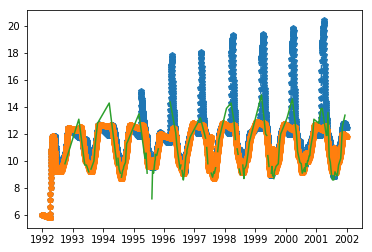

In [19]:
plt.plot(df_init['date'], df_init['Oxygen'], '--p')
plt.plot(df_best['date'], df_best['Oxygen'], '-p')
plt.plot(observations[observations['depth'] == '1,0']['date'], observations[observations['depth'] == '1,0']['oxygen'])
plt.show()

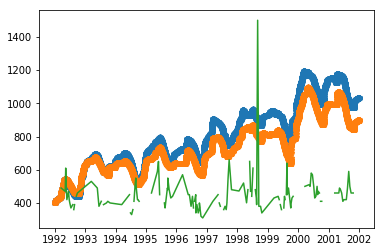

In [20]:
plt.plot(df_init['date'], df_init['TN']*1000, '--p')
plt.plot(df_best['date'], df_best['TN']*1000, '--p')
plt.plot(observations[observations['depth'] == '1,0']['date'], observations[observations['depth'] == '1,0']['nitrogene'])
plt.show()

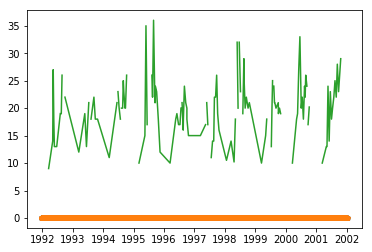

In [21]:
plt.plot(df_init['date'], df_init['TP'], '--p')
plt.plot(df_best['date'], df_best['TP'], '--p')
plt.plot(observations[observations['depth'] == '1,0']['date'], observations[observations['depth'] == '1,0']['phosphorus'])
plt.show()

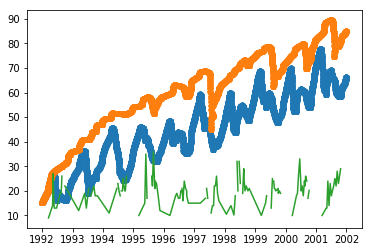

In [22]:
plt.plot(df_init['date'], df_init['TP']*1000, '--p')
plt.plot(df_best['date'], df_best['TP']*1000, '--p')
plt.plot(observations[observations['depth'] == '1,0']['date'], observations[observations['depth'] == '1,0']['phosphorus'])
plt.show()

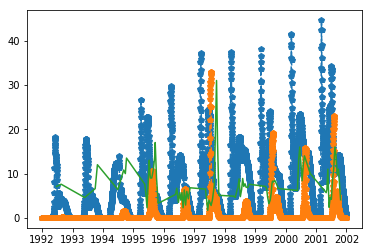

In [23]:
plt.plot(df_init['date'], df_init['Phyto. Chlorophyll'], '--p')
plt.plot(df_best['date'], df_best['Phyto. Chlorophyll'], '--p')
plt.plot(observations[observations['depth'] == '0,0-5,0']['date'], observations[observations['depth'] == '0,0-5,0']['chlorophyll'])
plt.show()

In [24]:
observations[observations['depth'] == '0,0-5,0']


,Site name,Site ID number,date,depth,chlorophyll,oxygen,temperature,nitrogene,phosphorus
40,Pyhäjärvi 93 va93,6396,1992-06-23 12:00:00,"0,0-5,0",7.1,NaN,NaN,NaN,13.0
72,Pyhäjärvi 93 va93,6396,1992-08-17 09:00:00,"0,0-5,0",7.6,NaN,NaN,NaN,19.0
112,Pyhäjärvi 93 va93,6396,1993-05-26 13:00:00,"0,0-5,0",4.6,NaN,NaN,480.0,18.0
147,Pyhäjärvi 93 va93,6396,1993-09-29 13:00:00,"0,0-5,0",6.6,NaN,NaN,400.0,19.0
153,Pyhäjärvi 93 va93,6396,1993-10-26 12:00:00,"0,0-5,0",12.0,NaN,NaN,410.0,15.0
175,Pyhäjärvi 93 va93,6396,1994-06-28 12:45:00,"0,0-5,0",6.4,NaN,NaN,380.0,18.0
220,Pyhäjärvi 93 va93,6396,1994-09-06 09:30:00,"0,0-5,0",10.8,NaN,NaN,480.0,19.0
233,Pyhäjärvi 93 va93,6396,1994-09-26 10:00:00,"0,0-5,0",10.0,NaN,NaN,510.0,17.0
240,Pyhäjärvi 93 va93,6396,1994-10-10 09:30:00,"0,0-5,0",13.5,NaN,NaN,490.0,32.0
259,Pyhäjärvi 93 va93,6396,1995-05-17 16:30:00,"0,0-5,0",7.6,NaN,7.3,500.0,19.0


In [25]:
np.sum(np.abs(df_init['Phyto. Chlorophyll'] - df_best['Phyto. Chlorophyll']))

23705.003691107566

In [26]:
np.sum(np.abs(df_init['TP'] - df_best['TP']))

58.193961845807834

In [27]:
np.sum(np.abs(df_init['TN'] - df_best['TN']))

271.6756873037982

In [28]:
np.sum(np.abs(df_init['Oxygen'] - df_best['Oxygen']))

2762.817663739794

In [29]:
chloro_obs = observations[observations['depth'] == '0,0-5,0'].copy()
meter_obs = observations[observations['depth'] == '1,0'].copy()

In [30]:
chloro_obs['simple_date'] = chloro_obs['date'].dt.date
meter_obs['simple_date'] = meter_obs['date'].dt.date

In [31]:
chl_best = pd.merge(chloro_obs, df_best, how='inner', left_on='simple_date', right_on='date')
chl_init = pd.merge(chloro_obs, df_init, how='inner', left_on='simple_date', right_on='date')
meter_best = pd.merge(meter_obs, df_best, how='inner', left_on='simple_date', right_on='date')
meter_init = pd.merge(meter_obs, df_init, how='inner', left_on='simple_date', right_on='date')

In [32]:
chl_best_err = np.sum(np.abs(chl_best['Phyto. Chlorophyll'] - chl_best['chlorophyll']))

In [33]:
chl_best_err

622.6526472589373

In [34]:
chl_init_err = np.sum(np.abs(chl_init['Phyto. Chlorophyll'] - chl_init['chlorophyll']))

In [35]:
chl_init_err

599.3553830367064

In [36]:
chl_best_err = np.sum(np.abs(meter_best['oxygen'] - meter_best['Oxygen']))
chl_best_err

81.38551994810899

In [37]:
chl_best_err = np.sum(np.abs(meter_init['oxygen'] - meter_init['Oxygen']))
chl_best_err

115.66700638231248

In [38]:
-(81.18 - 115.66)/115.66

0.298115165139201